<a href="https://colab.research.google.com/github/Karmukilan-S/Kuramoto-model-/blob/main/Kuramoto_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
K=100
w1=0
w2=0
w3=0
N=100

# 3 OSCILLATORS WITH PHASE FLOW

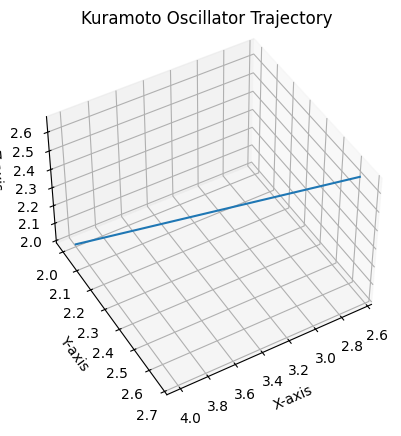

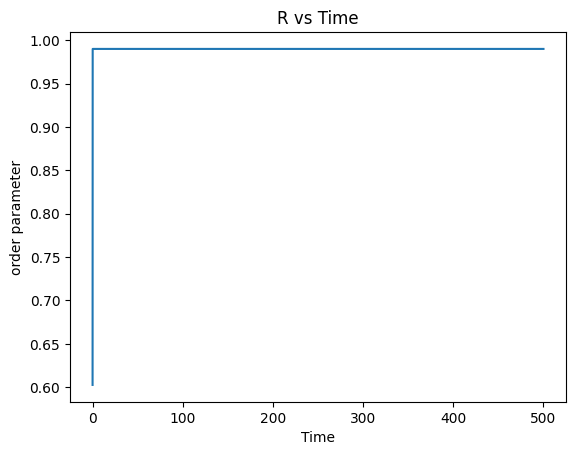

In [ ]:
def sm(a,c):
  d=[]
  for i in range(len(a)):
    d.append(c*a[i])
  return d
def va(a,b):
  d=[]
  for i in range(len(a)):
    d.append(a[i]+b[i])
  return d
def system(X):
  f1=w1+K/3*(np.sin(X[1]-X[0])+np.sin(X[2]-X[0]))
  f2=w2+K/3*(np.sin(X[0]-X[1])+np.sin(X[2]-X[1]))
  f3=w3+K/3*(np.sin(X[1]-X[2])+np.sin(X[0]-X[2]))
  return [f1,f2,f3]
def runge_step(f,x,dt):
  k1=sm(f(x),dt)
  k2=sm(f(va(x,sm(k1,0.5))),dt)
  k3=sm(f(va(x,sm(k2,0.5))),dt)
  k4=sm(f(va(x,k3)),dt)
  return va(x,sm(va(va(k1,sm(k2,2)), va(sm(k3,2),k4)),0.1667))
def solution(Xini,f,t,dt):
  tin=0
  T=[0]
  x=[Xini[0]]
  y=[Xini[1]]
  z=[Xini[2]]
  R=[0.33*np.sqrt((np.cos(Xini[0])+np.cos(Xini[1])+np.cos(Xini[2]))**2+(np.sin(Xini[0])+np.sin(Xini[1])+np.sin(Xini[2]))**2)]
  while tin<t:
    X=runge_step(f,Xini,dt)
    X=np.mod(X, 2 * np.pi)
    x.append(X[0]),y.append(X[1]),z.append(X[2])
    R.append(0.33*np.sqrt((np.cos(X[0])+np.cos(X[1])+np.cos(X[2]))**2+(np.sin(X[0])+np.sin(X[1])+np.sin(X[2]))**2))

    tin=tin+dt
    T.append(tin)
    Xini=X
    #print(Xini)
  return [x,y,z,R,T]
'''plt.ion()
r=solution([4,2,2],system,500,0.01)
x=r[0]
y=r[1]
z=r[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Kuramoto Oscillator Trajectory')
ax.view_init(45, 60)
plt.show()



plt.plot(r[4],r[3])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('order parameter')
plt.title('R vs Time')
plt.show()

'''


# N OSCILLATOR SYSTEM DYNAMICS

initialising Paramters

In [ ]:
# Set parameters
N = 100
t = 200
dt = 0.01
K_values = np.linspace(10, 90, 20)  # Different K values

# Initial conditions
Xini = np.random.uniform(0, 2*np.pi, N)


# Calculate RV
gamma = 50  # Scale (width)
w =  cauchy.rvs(loc=0, scale=gamma, size=N)


r vs t (for various k values)

In [ ]:


def system(X, w, K, N):
    X=np.array(X)
    interaction_sum = np.sum(np.sin(-X[:, None] + X), axis=1)
    return w + (K / N) * interaction_sum



def runge_step(f, x, w, K, N, dt):
    k1 = f(x, w, K, N) * dt
    k2 = f(x + 0.5 * k1, w, K, N) * dt
    k3 = f(x + 0.5 * k2, w, K, N) * dt
    k4 = f(x + k3, w, K, N) * dt
    y= x + (k1 + 2 * k2 + 2 * k3 + k4) * (1 / 6)

    return y

def solution(Xini, w, K, N, t, dt):
    tin = 0
    T = [0]
    Xini = np.array(Xini)
    w = np.array(w)

    cos_term = np.sum(np.cos(Xini))
    sin_term = np.sum(np.sin(Xini))
    r = (cos_term**2 + sin_term**2)/N**2
    R = [np.sqrt(r)/N]

    while tin < t:
        X = runge_step(system, Xini, w, K, N, dt)

        cos_term = np.sum(np.cos(X))
        sin_term = np.sum(np.sin(X))
        r = (cos_term**2 + sin_term**2) / N**2
        Xini=X
        R.append(np.sqrt(r))
        tin += dt
        T.append(tin)

    return R, T

# List to store the results for different K values
all_R_values = []

# Run the simulation for each K value
for K in K_values:
    R,T = solution(Xini, w, K, N, t, dt)
    all_R_values.append(R)

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
for i, R in enumerate(all_R_values):
    ax.plot(T, R, label=f"K = {K_values[i]:.2f}", color=plt.cm.binary(i / len(K_values)))

# Add color bar
sm = plt.cm.ScalarMappable(cmap='binary', norm=plt.Normalize(vmin=min(K_values), vmax=max(K_values)))
sm.set_array([])  # Empty array for color bar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("K values")

ax.set_xlabel('Time')
ax.set_ylabel('r (Order Parameter)')
ax.set_title('Synchronization vs Time for Different K values,gamma=5 ')
#ax.legend(title="Coupling Strength K")
plt.tight_layout()  # Adjust layout to prevent clipping of labels and color bar
plt.show()

'# List to store the results for different K values\nall_R_values = []\n\n# Run the simulation for each K value\nfor K in K_values:\n    R,T = solution(Xini, w, K, N, t, dt)\n    all_R_values.append(R)\n\nfig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size\nfor i, R in enumerate(all_R_values):\n    ax.plot(T, R, label=f"K = {K_values[i]:.2f}", color=plt.cm.binary(i / len(K_values)))\n\n# Add color bar\nsm = plt.cm.ScalarMappable(cmap=\'binary\', norm=plt.Normalize(vmin=min(K_values), vmax=max(K_values)))\nsm.set_array([])  # Empty array for color bar\ncbar = fig.colorbar(sm, ax=ax)\ncbar.set_label("K values")\n\nax.set_xlabel(\'Time\')\nax.set_ylabel(\'r (Order Parameter)\')\nax.set_title(\'Synchronization vs Time for Different K values,gamma=5 \')\n#ax.legend(title="Coupling Strength K")\nplt.tight_layout()  # Adjust layout to prevent clipping of labels and color bar\nplt.show()'

In [ ]:
N=100
t=20
dt=0.001

r vs k (t>>1)

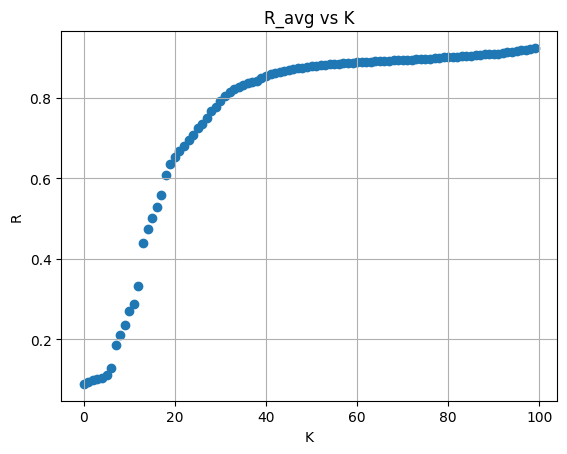

In [ ]:
K_values = np.arange(0, 100, 1)  # Different K value
def sol(Xini,w,K,N,t,dt):
  tin=0
  T=[0]
  R=[]
  Xini=np.array(Xini)
  w=np.array(w)
  while tin < t:
      X = runge_step(system, Xini, w, K, N, dt)
      Xini=X
      tin += dt
      T.append(tin)
      cos_term = np.sum(np.cos(Xini))
      sin_term = np.sum(np.sin(Xini))
      r = np.sqrt((cos_term**2 + sin_term**2) / N**2)
      R.append(r)
  return np.mean(R)

R_values = []

# Run the simulation for each K value
for K in K_values:
    R = sol(Xini, w, K, N, t, dt)
    R_values.append(R)


plt.scatter(K_values,R_values)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('R')
plt.title('R_avg vs K')
plt.show()

# **3D KURAMOTO MODEL**